In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def wringle(df):
    df = df.drop(columns = ['Name','Ticket','Cabin','Embarked'])
    return df

In [4]:
train = wringle(train)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [5]:
X = train.drop(columns = ['Survived'])
y = train['Survived']

In [6]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [7]:
model = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression()
)

model.fit(X_train,y_train)

C:\Users\mosae\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['Sex'], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=False,
                               verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                         

In [8]:
training_acc = model.score(X_train, y_train)
val_acc = model.score(X_test, y_test)

print('Training Accuracy Score:', training_acc)
print('Validation Accuracy Score:', val_acc)

Training Accuracy Score: 0.8154093097913323
Validation Accuracy Score: 0.746268656716418


In [18]:
def ROC_curve(model):
    true_positive = []
    false_positive = []
    FP_list = []
    FN_list = []
    TP_list = []
    TN_list = []
    for i in np.arange(0.01, 1.0, 0.01):
        # i will be the logestic regretion trash hold
        # calculat the logestic regresion with the trash hold
        preds = np.where(model.predict_proba(X_test)[:,1] > i, 1, 0)
        # get teh confuation metrecs
        cm = confusion_matrix(y_test, preds)
        # False positive 
        FP = cm[0][1]
        FP_list.append(FP)
        # False negative
        FN = cm[1][0]
        FN_list.append(FN)
        # True positive 
        TP = cm[1][1]
        TP_list.append(TP)
        # True negative
        TN = cm[0][0]
        TN_list.append(TN)
        # Sensitivity, recall, or true positive rate
        TPR = TP/(TP+FN)
        # Specificity or true negative rate
        TNR = FP/(TN+FP)
        # append the point into two list 
        # the first is true_positive_list
        true_positive.append(TPR)
        # the second is False_positive_list 
        false_positive.append(TNR)
    plt.figure(figsize=(10,10))
    plt.plot(false_positive,true_positive)
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title("Receiver Operating Characteristics Curve")
    plt.show()
    new_dataframe = pd.DataFrame({
        'FP' : FP_list,
        'FN' : FN_list,
        'TP' : TP_list,
        'TN' : TN_list
    })
    plt.figure(figsize=(10,10))
    sns.distplot(new_dataframe['TP'],bins=60, label='TP')
    sns.distplot(new_dataframe['TN'],bins=60, label='TN')
    plt.legend()
    plt.title('The distribution of True Negative and True Positive')
    plt.show();
    

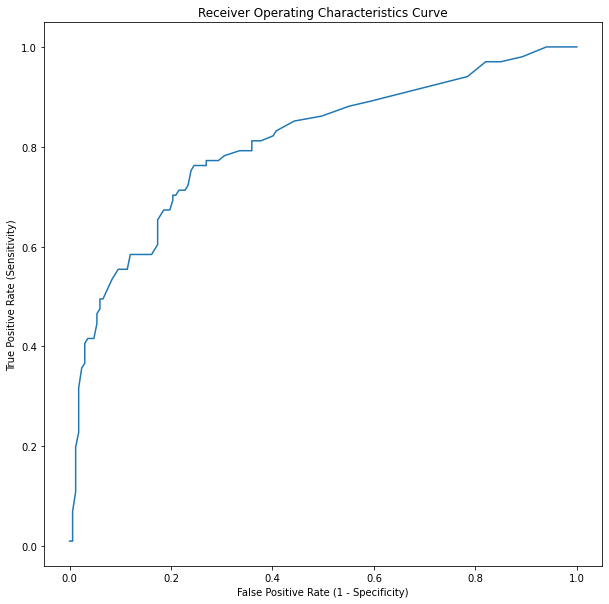

C:\Users\mosae\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mosae\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


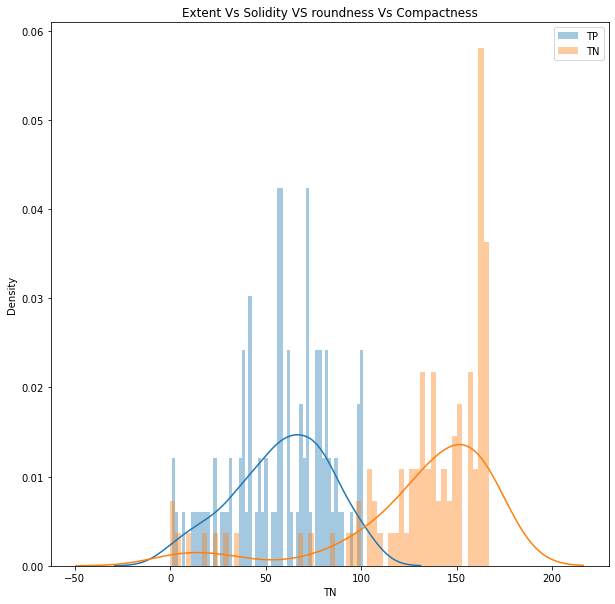

In [19]:
ROC_curve(model)